In [48]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.metrics import AUC, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
from PIL import Image


In [49]:
direct = r"C:\\Users\\alan\\AI Project\\CSC547 Final Project\\brain_tumor_dataset" 
# Directory of root folder of dataset (split into Train and Test Folders within that directory)

In [50]:
train_dataset_dir = "C:\\Users\\alan\\AI Project\\CSC547 Final Project\\brain_tumor_dataset\\train"
test_dataset_dir  = "C:\\Users\\alan\\AI Project\\CSC547 Final Project\\brain_tumor_dataset\\test"

In [51]:
# normalize the images as they are read in
# note: you can add other data augmentation functions to the ImageDataGenerator if you want
# Here is a page with what you can add to the ImageDataGenerator: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

In [52]:
# create a stream of images, resized to 256x256, grouped into batches of size 8, and classified into 2 categories
train_dataset = train.flow_from_directory(train_dataset_dir, target_size = (256,256), batch_size=8, class_mode='binary')
test_dataset  = test.flow_from_directory(test_dataset_dir, target_size = (256,256), batch_size=8, class_mode='binary')

Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [53]:
model = Sequential() # create a new sequential model

In [54]:
# Add a 2D convolution layer with 16 features, a 3x3 filter size, relu activation, and padding
model.add(Conv2D(16, (3,3), activation='relu', padding = 'same', input_shape=(256,256,3)))
# Add a Max Pool layer with a 2x2 pooling window
model.add(MaxPool2D(2, 2))

# These are the same as above, except the convolution has 32 features
model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(2, 2))

In [55]:
# These are the same as above, except the convolution has 64 features
model.add(Conv2D(64, (3,3), activation='relu', padding = 'same'))
model.add(MaxPool2D(2, 2))

# These are the same as above, except the convolution has 128 features
model.add(Conv2D(128, (3,3), activation='relu', padding = 'same'))
model.add(MaxPool2D(2, 2))

In [56]:
# Flatten into a single vector
model.add(Flatten())

# Add a dense layer to 128 nodes (to extract relationships between features)
model.add(Dense(128))


In [57]:
# Final Dense layer with 1 node and "sigmoid" activation function to extract a binary prediction 
# (whether an image contains a tumor or not).
model.add(Dense(1, activation='sigmoid'))

In [58]:
# Compile the model using adam optimization, calculating loss using binary cross-entropy loss, and collect the metrics listed
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy', AUC(), TruePositives(), TrueNegatives(), FalsePositives(), FalseNegatives()])

In [59]:
# Print out a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 64)      

In [60]:
# Train the model on the training dataset over 10 epochs, using the test dataset to validate the results
result = model.fit(train_dataset, steps_per_epoch=len(train_dataset), epochs=10, validation_data=test_dataset)

Epoch 1/10
26/26 [==============================] - 7s 240ms/step - loss: 0.7054 - accuracy: 0.6287 - auc_2: 0.6725 - true_positives_2: 100.0000 - true_negatives_2: 27.0000 - false_positives_2: 51.0000 - false_negatives_2: 24.0000 - val_loss: 0.6400 - val_accuracy: 0.6078 - val_auc_2: 0.9016 - val_true_positives_2: 12.0000 - val_true_negatives_2: 19.0000 - val_false_positives_2: 1.0000 - val_false_negatives_2: 19.0000
Epoch 2/10
26/26 [==============================] - 6s 248ms/step - loss: 0.5187 - accuracy: 0.7624 - auc_2: 0.8094 - true_positives_2: 108.0000 - true_negatives_2: 46.0000 - false_positives_2: 32.0000 - false_negatives_2: 16.0000 - val_loss: 0.4524 - val_accuracy: 0.9020 - val_auc_2: 0.8766 - val_true_positives_2: 30.0000 - val_true_negatives_2: 16.0000 - val_false_positives_2: 4.0000 - val_false_negatives_2: 1.0000
Epoch 3/10
26/26 [==============================] - 6s 232ms/step - loss: 0.4631 - accuracy: 0.7970 - auc_2: 0.8518 - true_positives_2: 114.0000 - true_negat

In [61]:
new_image = cv2.imread('C:\\Users\\alan\\AI Project\\CSC547 Final Project\\brain_tumor_dataset\\unseen data with brain tumor.jpg')

In [62]:
import numpy as np

In [63]:
new_image = cv2.resize(new_image, (256, 256))
new_image = np.expand_dims(new_image, axis=0)
new_image = new_image / 255.0

In [64]:
predictions = model.predict(new_image)
class_index = np.argmax(predictions)
class_label = classes[class_index]

1/1 [==============================] - 0s 82ms/step


In [65]:
print('Predicted class label:', class_label)

Predicted class label: Y1.jpg


In [66]:
import matplotlib.pyplot as plt

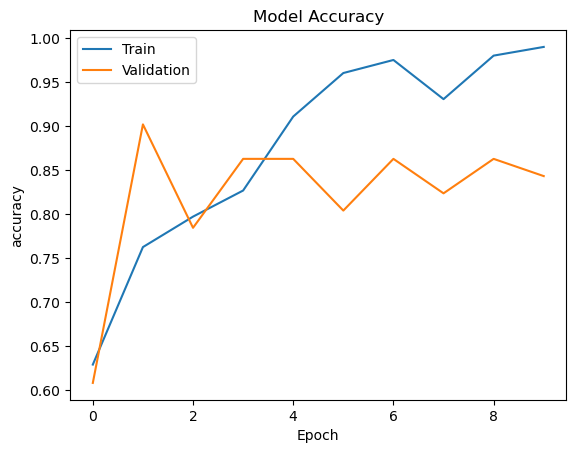

In [67]:
# Plot the training and validation accuracy over epochs
plt.plot(result.history['accuracy']) #plt.plot() is a function used to create a line plot of two or more arrays of data
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

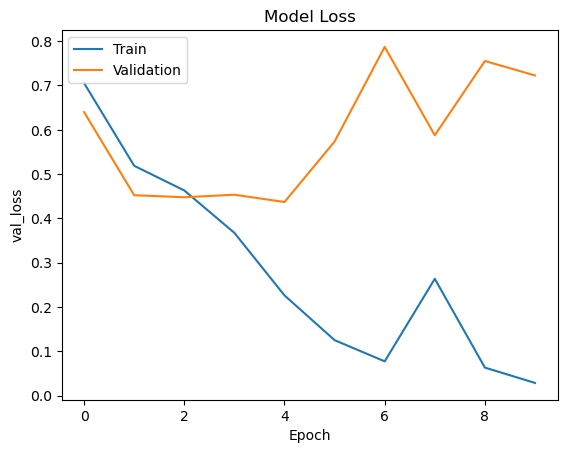

In [68]:
# Plot the training and validation loss over epochs
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('val_loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()